🎯 Acurácia Random Forest: 0.795
Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       300
           1       0.67      0.35      0.46       100

    accuracy                           0.80       400
   macro avg       0.74      0.65      0.67       400
weighted avg       0.78      0.80      0.77       400

Matriz de Confusão - Random Forest:
[[283  17]
 [ 65  35]]

🌳 Acurácia Árvore de Decisão: 0.7625


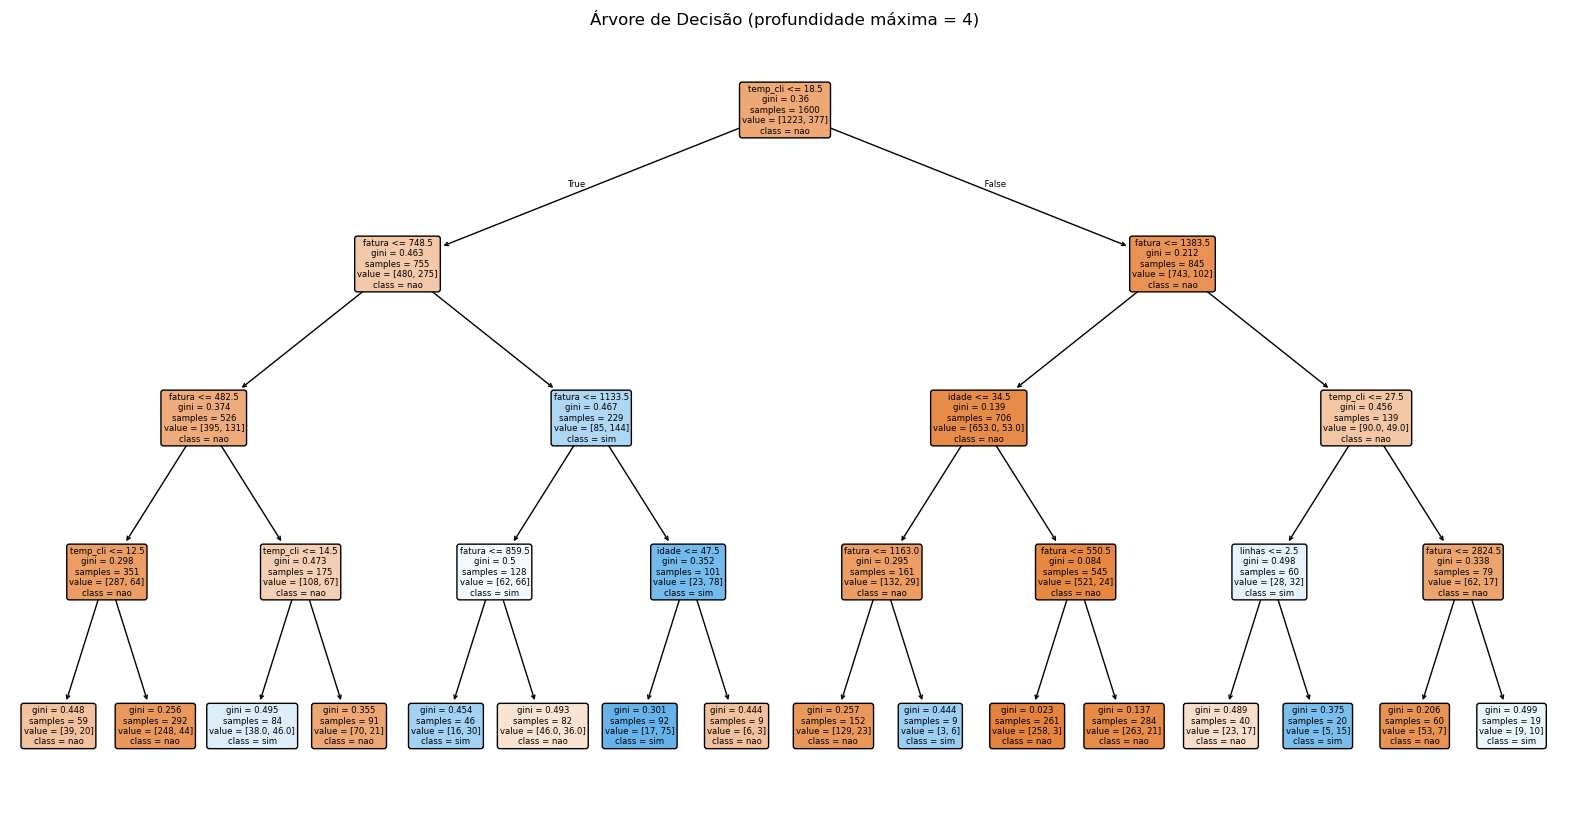

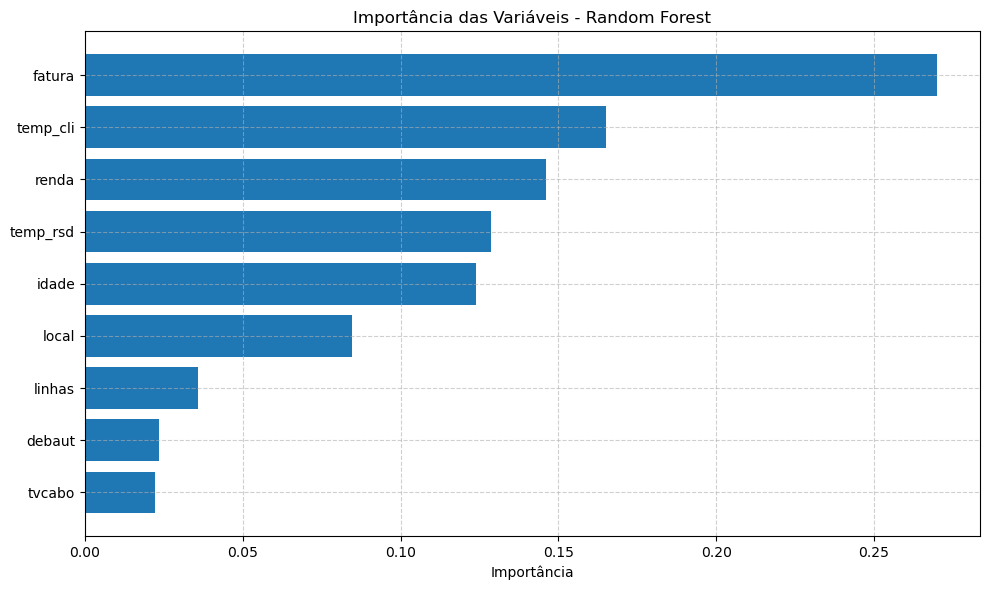


📊 Importância das variáveis:
   Variável  Importância
0    fatura     0.270046
1  temp_cli     0.165150
2     renda     0.145985
3  temp_rsd     0.128536
4     idade     0.123917
5     local     0.084671
6    linhas     0.035995
7    debaut     0.023507
8    tvcabo     0.022193


In [1]:
# Importações
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Carregar os dados
df = pd.read_excel("TECAL.xlsx", sheet_name="TECAL")  # Substitua pelo caminho do seu arquivo

# 2. Pré-processamento dos dados
df_model = df.copy()

# Transformar colunas categóricas em números (sim/não, local)
le = LabelEncoder()
for col in ['local', 'tvcabo', 'debaut', 'cancel']:
    df_model[col] = le.fit_transform(df_model[col])

# Separar variáveis (X) e alvo (y)
X = df_model.drop(columns=['id', 'cancel'])
y = df_model['cancel']

# 3. Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Treinar Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

# Avaliar Random Forest
print("🎯 Acurácia Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Relatório de Classificação - Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Matriz de Confusão - Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

# 5. Treinar Árvore de Decisão individual (para visualizar)
modelo_arvore = DecisionTreeClassifier(max_depth=4, random_state=42)
modelo_arvore.fit(X_train, y_train)
y_pred_arvore = modelo_arvore.predict(X_test)

# Avaliar árvore
print("\n🌳 Acurácia Árvore de Decisão:", accuracy_score(y_test, y_pred_arvore))

# Visualizar a árvore
plt.figure(figsize=(20, 10))
plot_tree(modelo_arvore, feature_names=X.columns, class_names=['nao', 'sim'], filled=True, rounded=True)
plt.title("Árvore de Decisão (profundidade máxima = 4)")
plt.show()

# 6. Visualizar Importância das Variáveis no Random Forest
importancias = modelo_rf.feature_importances_
df_importancias = pd.DataFrame({
    'Variável': X.columns,
    'Importância': importancias
}).sort_values(by='Importância', ascending=False)

# Gráfico de importância
plt.figure(figsize=(10, 6))
plt.barh(df_importancias['Variável'], df_importancias['Importância'])
plt.gca().invert_yaxis()
plt.title("Importância das Variáveis - Random Forest")
plt.xlabel("Importância")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Mostrar tabela de importância
print("\n📊 Importância das variáveis:")
print(df_importancias.reset_index(drop=True))
